<h1 align="center"> Linear Regression </h1>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# import warmUpExercise as wue
#import computeCost as cc
#import gradientDescent as gd
%matplotlib inline

In [2]:
data = np.loadtxt('ex1data1.txt', delimiter=",")
X = data[:,0]
y = data[:,1]
m = len(y) # number of training examples

In [3]:
X

array([  6.1101,   5.5277,   8.5186,   7.0032,   5.8598,   8.3829,
         7.4764,   8.5781,   6.4862,   5.0546,   5.7107,  14.164 ,
         5.734 ,   8.4084,   5.6407,   5.3794,   6.3654,   5.1301,
         6.4296,   7.0708,   6.1891,  20.27  ,   5.4901,   6.3261,
         5.5649,  18.945 ,  12.828 ,  10.957 ,  13.176 ,  22.203 ,
         5.2524,   6.5894,   9.2482,   5.8918,   8.2111,   7.9334,
         8.0959,   5.6063,  12.836 ,   6.3534,   5.4069,   6.8825,
        11.708 ,   5.7737,   7.8247,   7.0931,   5.0702,   5.8014,
        11.7   ,   5.5416,   7.5402,   5.3077,   7.4239,   7.6031,
         6.3328,   6.3589,   6.2742,   5.6397,   9.3102,   9.4536,
         8.8254,   5.1793,  21.279 ,  14.908 ,  18.959 ,   7.2182,
         8.2951,  10.236 ,   5.4994,  20.341 ,  10.136 ,   7.3345,
         6.0062,   7.2259,   5.0269,   6.5479,   7.5386,   5.0365,
        10.274 ,   5.1077,   5.7292,   5.1884,   6.3557,   9.7687,
         6.5159,   8.5172,   9.1802,   6.002 ,   5.5204,   5.0

## Objective of Linear Regression

The objective of linear regression is to minimize the cost function 

<img src="images/meanSquaredError.png" alt="Mean Squared Error">

where h<sub>θ</sub>(x) = θ<sup>T</sup>x = θ<sub>0</sub> + θ<sub>1</sub>x<sub>1</sub> (you can see more down below) 

## Hypothesis for Linear Model 

<img src="images/hypothesis.png" alt="hypothesis">

Add a column of ones to x to account for θ<sub>0</sub>

## Minimizing Cost Function using Gradient Descent

<img src="images/gradientDescent.png" alt="hypothesis">

In [4]:
def computeCost(X, y, theta):

    #COMPUTECOST Compute cost for linear regression
    #   J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
    #   parameter for linear regression to fit the data points in X and y

    # Initialize some useful values

    m = len(y) # number of training examples

    # You need to return the following variables correctly 
    J = 0

    # note that 

    # theta is an (n+1)-dimensional vector 

    # X is an m x (n+1)-dimensional matrix

    # y is an m-dimensional vector

    s = np.power(( X.dot(theta) - np.transpose([y]) ), 2)

    J = (1.0/(2*m)) * s.sum( axis = 0 )

    return J

In [5]:
def gradientDescent(X, y, theta, alpha, num_iters):

    # GRADIENTDESCENT Performs gradient descent to learn theta

    # theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) updates theta by 

    # taking num_iters gradient steps with learning rate alpha

    # Initialize some useful values

    m = len(y) # number of training examples

    J_history = np.zeros((num_iters, 1))

    for i in xrange(num_iters):


        theta = theta - alpha*(1.0/m) * np.transpose(X).dot(X.dot(theta) - np.transpose([y]))

        # Save the cost J in every iteration    
        J_history[i] = computeCost(X, y, theta)

    return theta, J_history

## Minimizing Cost Function using Gradient Descent

In [6]:
X_padded = np.column_stack((np.ones((m,1)), X)) 

theta = np.zeros((2, 1)) # initialize fitting parameters

In [7]:
# Some gradient descent settings

iterations = 1500
alpha = 0.01

# compute and display initial cost
print(computeCost(X_padded, y, theta))

[ 32.07273388]


In [8]:
# run gradient descent
theta, J_history = gradientDescent(X_padded, y, theta, alpha, iterations)

# print theta to screen
print('Theta found by gradient descent: ')
print("{:f}, {:f}".format(theta[0,0], theta[1,0]))

Theta found by gradient descent: 
-3.630291, 1.166362


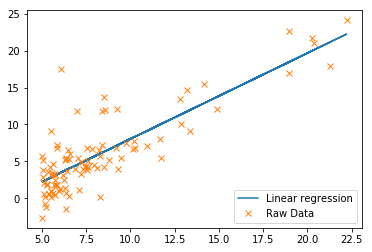

In [13]:
fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(X,X_padded.dot(theta),'-', label='Linear regression');
ax.plot(X, y, 'x', label= 'Raw Data');
ax.legend(loc = 'lower right');

In [10]:
predict1 = np.array([1, 3.5]).dot(theta)
print("For population = 35,000, we predict a profit of {:f}".format( float(predict1*10000) ))
predict2 = np.array([1, 7]).dot(theta)
print('For population = 70,000, we predict a profit of {:f}'.format( float(predict2*10000) ))

For population = 35,000, we predict a profit of 4519.767868
For population = 70,000, we predict a profit of 45342.450129
